# 1. Task: Data Collection and Preparation
   - Gather diverse and representative IoT network traffic data
   - Label the data as normal or malicious
   - Preprocess and clean the data for feature extraction


**website:**
https://www.unb.ca/cic/datasets/iotdataset-2023.html
**Topology chart :**
https://www.unb.ca/cic/_assets/images/cic-topology-2023.jpg
**Topology Diagram:**
https://www.unb.ca/cic/_assets/images/cic-diagram3-2023.jpg


# checking 168 cvs file of CICIOT2023

In [1]:
import os
import pandas as pd

# Directory where the CSV files are located
data_directory = f"E:/NITW/Project/Datasets/CICIOT2023"

# Function to read a CSV file and extract unique attack categories
def extract_unique_attack_categories(file_path):
    try:
        df = pd.read_csv(file_path)
        unique_categories = df['label'].unique()
        return unique_categories
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return []

# List to store all unique attack categories
all_unique_categories = set()

# Loop through all the CSV files and extract unique attack categories
for root, _, files in os.walk(data_directory):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            unique_categories = extract_unique_attack_categories(file_path)
            all_unique_categories.update(unique_categories)

# Print the total number of unique attack categories
print("Total number of unique attack categories:", len(all_unique_categories))
print("Unique attack categories:", all_unique_categories)


Total number of unique attack categories: 34
Unique attack categories: {'DoS-UDP_Flood', 'DNS_Spoofing', 'DoS-HTTP_Flood', 'Mirai-greip_flood', 'MITM-ArpSpoofing', 'Recon-PortScan', 'DDoS-SlowLoris', 'DDoS-UDP_Fragmentation', 'DDoS-SynonymousIP_Flood', 'DDoS-ACK_Fragmentation', 'Recon-HostDiscovery', 'Recon-PingSweep', 'BrowserHijacking', 'XSS', 'DDoS-ICMP_Fragmentation', 'Recon-OSScan', 'DDoS-PSHACK_Flood', 'DDoS-UDP_Flood', 'CommandInjection', 'VulnerabilityScan', 'Mirai-udpplain', 'DDoS-RSTFINFlood', 'DDoS-TCP_Flood', 'DDoS-SYN_Flood', 'DDoS-ICMP_Flood', 'DoS-TCP_Flood', 'BenignTraffic', 'SqlInjection', 'Backdoor_Malware', 'Uploading_Attack', 'Mirai-greeth_flood', 'DDoS-HTTP_Flood', 'DoS-SYN_Flood', 'DictionaryBruteForce'}


# Support count of each attack

In [2]:
import os
import pandas as pd

# Directory where the CSV files are located
data_directory = f"E:/NITW/Project/Datasets/CICIOT2023"

# Function to read a CSV file and extract unique attack categories along with their counts
def extract_attack_category_counts(file_path):
    try:
        df = pd.read_csv(file_path)
        category_counts = df['label'].value_counts().to_dict()
        return category_counts
    except Exception as e:
        print(f"Error reading {file_path}: {e}")
        return {}

# Dictionary to store attack categories and their counts
attack_category_counts = {}

# Loop through all the CSV files and extract attack category counts
for root, _, files in os.walk(data_directory):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            category_counts = extract_attack_category_counts(file_path)
            for category, count in category_counts.items():
                if category in attack_category_counts:
                    attack_category_counts[category] += count
                else:
                    attack_category_counts[category] = count

# Print the total number of unique attack categories
print("Total number of unique attack categories:", len(attack_category_counts))
print("Unique attack categories and their counts:")
for category, count in attack_category_counts.items():
    print(f"{category}: {count} records")


Total number of unique attack categories: 34
Unique attack categories and their counts:
DDoS-ICMP_Flood: 1256077 records
DDoS-UDP_Flood: 942078 records
DDoS-TCP_Flood: 784469 records
DDoS-PSHACK_Flood: 715211 records
DDoS-SYN_Flood: 709589 records
DDoS-RSTFINFlood: 705927 records
DDoS-SynonymousIP_Flood: 626885 records
DoS-UDP_Flood: 578919 records
DoS-TCP_Flood: 466165 records
DoS-SYN_Flood: 354512 records
BenignTraffic: 191192 records
Mirai-greeth_flood: 173292 records
Mirai-udpplain: 155570 records
Mirai-greip_flood: 130804 records
DDoS-ICMP_Fragmentation: 79085 records
MITM-ArpSpoofing: 53435 records
DDoS-ACK_Fragmentation: 49680 records
DDoS-UDP_Fragmentation: 49739 records
DNS_Spoofing: 31205 records
Recon-HostDiscovery: 23402 records
Recon-OSScan: 17190 records
Recon-PortScan: 14431 records
DoS-HTTP_Flood: 12438 records
VulnerabilityScan: 6501 records
DDoS-HTTP_Flood: 5100 records
DDoS-SlowLoris: 4166 records
DictionaryBruteForce: 2358 records
BrowserHijacking: 1002 records
Comm


# total records

In [3]:
total_records = 0

for  count in attack_category_counts.values():
    total_records+=count
print(f"total records in 168 files are {total_records}")

total records in 168 files are 8144135


# new data frame with all the unique records from all 168 files

In [4]:
import os
import pandas as pd

# Directory where the CSV files are located
data_directory = f"E:/NITW/Project/Datasets/CICIOT2023"

# List to store DataFrames of each file
data_frames = []

# Loop through all the CSV files and read them into DataFrames
for root, _, files in os.walk(data_directory):
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(root, file)
            df = pd.read_csv(file_path)
            data_frames.append(df)

# Concatenate all DataFrames into a single DataFrame
all_data_df = pd.concat(data_frames)

# Remove any duplicate rows based on all columns
all_data_df.drop_duplicates(inplace=True)

# Reset the index of the final DataFrame
all_data_df.reset_index(drop=True, inplace=True)

# Print the shape of the final DataFrame and a preview of its contents
print("Shape of the final DataFrame:", all_data_df.shape)
print(all_data_df.head())


Shape of the final DataFrame: (8144134, 47)
   flow_duration  Header_Length  Protocol Type  Duration          Rate  \
0       0.000000          55.14           6.11     64.64     10.954103   
1       0.026477       28116.00          16.84     64.54  21331.988419   
2       0.000000           0.00           1.00     64.00     36.853401   
3       0.000000          54.00           6.00     64.00      3.368188   
4       0.097976       21574.00          17.00     64.00   6961.557644   

          Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0     10.954103    0.0              0.0              0.0              0.0   
1  21331.988419    0.0              0.0              0.0              0.0   
2     36.853401    0.0              0.0              0.0              0.0   
3      3.368188    0.0              0.0              1.0              0.0   
4   6961.557644    0.0              0.0              0.0              0.0   

   ...       Std  Tot size           IAT  Number

# checking for null values

In [5]:
null_counts = all_data_df.isnull().sum()
# Print the null value counts for each column
print("Null Value Counts:")
print(null_counts)


Null Value Counts:
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label          

# function for printing number records for each attack 

In [6]:
def print_attack_support_count(data, target_column=None):
    """
    Print the support count for each attack category in the given DataFrame.

    Parameters:
        data (pandas.DataFrame): A DataFrame containing the attack data.
        target_column (str, optional): The name of the column representing attack categories.
            If not specified, the last column of the DataFrame is considered as the target class.

    Returns:
        None

    This function calculates the support count for each attack category in the specified target column of the provided DataFrame.
    The support count represents the number of occurrences of each attack category in the data.
    The function then prints the attack category and its corresponding support count for each unique attack category.

    If target_column is not specified, the function will consider the last column of the DataFrame as the target class.
    """

    if target_column is None:
        target_column = data.columns[-1]
        print(f"Target column not specified. Considering the last column '{target_column}' as the target class.")

    # Calculate the support count for each attack
    attack_counts = data[target_column].value_counts()

    # Print the support count for each attack
    for attack, count in attack_counts.items():
        print(f"{attack}: {count}")


# checking the attack support count for our total dataframe


 print_attack_support_count(all_data_df)

In [13]:
all_data_df.columnsmns

Index(['flow_duration', 'Header_Length', 'Protocol Type', 'Duration', 'Rate',
       'Srate', 'Drate', 'fin_flag_number', 'syn_flag_number',
       'rst_flag_number', 'psh_flag_number', 'ack_flag_number',
       'ece_flag_number', 'cwr_flag_number', 'ack_count', 'syn_count',
       'fin_count', 'urg_count', 'rst_count', 'HTTP', 'HTTPS', 'DNS', 'Telnet',
       'SMTP', 'SSH', 'IRC', 'TCP', 'UDP', 'DHCP', 'ARP', 'ICMP', 'IPv', 'LLC',
       'Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'IAT', 'Number',
       'Magnitue', 'Radius', 'Covariance', 'Variance', 'Weight', 'label'],
      dtype='object')

# saving the extracted file to the disk

In [12]:
# Reset the index of the final DataFrame
all_data_df.reset_index(drop=True, inplace=True)

# Save the DataFrame to a CSV file in the local file system
output_file_path = "E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/all_data.csv"
all_data_df.to_csv(output_file_path, index=False)

# Print a message to indicate successful saving
print(f"DataFrame has been saved to {output_file_path}.")

DataFrame has been saved to E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/all_data.csv.


# Data visualisation
Performing data visualization techniques before feature extraction is an excellent approach to gain insights into your dataset and understand the relationships between features and the target class (attack class in your case). Visualization helps in identifying patterns, trends, and potential correlations, which can guide your feature selection process and model development.

Here are some data visualization techniques you can consider applying to your dataset:

1. **Histograms**: Plot histograms to visualize the distribution of each feature. This helps identify any skewedness, outliers, or patterns in the data.

2. **Bar Plots**: Use bar plots to visualize the count of samples belonging to each attack class. This provides an overview of the class distribution and potential class imbalance issues.

3. **Box Plots**: Box plots are useful for visualizing the spread and central tendency of features across different attack classes. This can help detect feature differences between different classes.

4. **Scatter Plots**: Use scatter plots to explore the relationship between two features and how they relate to the attack class.

5. **Heatmaps**: Plot a heatmap to visualize the correlation matrix between features. This helps identify potential multicollinearity and the relationship between features and the target class.

6. **Pair Plots**: Pair plots show scatter plots between pairs of features in the dataset. This provides a comprehensive view of the relationships between multiple features.

7. **Line Plots or Time Series Visualization**: If your dataset contains time-based features, consider plotting line plots or time series visualizations to observe temporal patterns.

8. **Violin Plots**: Violin plots combine the features of box plots and kernel density plots to show the distribution of each feature across different attack classes.

9. **Stacked Bar Plots**: For categorical features, use stacked bar plots to visualize the proportion of each category within different attack classes.

10. **3D Visualization**: If your dataset has multiple features, consider using 3D visualization to explore relationships among three features and the attack class.

Before proceeding with feature extraction, conducting these data visualization techniques can provide valuable insights into the dataset's characteristics and potentially reveal patterns or correlations that may impact your model's performance. It is essential to observe how different features vary across different attack classes and how they contribute to distinguishing between normal and attack instances. This understanding will inform your feature selection process and enable you to build a more robust and accurate anomaly-based NIDS.

# Train,validation and test split

In [1]:
#loading the data set that has been extracted from the CICIOT2023 168 csv files
import pandas as pd
input_file_path = "E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/all_data.csv"
total_data = pd.read_csv(input_file_path)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Step 1: Split the data into train and remaining data (val+test)
train_data, remaining_data = train_test_split(total_data, test_size=0.3, random_state=42)

# Step 2: Split the remaining data into validation and test sets
val_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

# Step 3: Save each split dataset into separate CSV files
# train_data.to_csv("E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/train_data.csv", index=False)
# val_data.to_csv("E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/val_data.csv", index=False)
# test_data.to_csv("E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/test_data.csv", index=False)

# Visualisation on train_data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

def visualize_dataset(data, sample_size=None):
    """
    Visualize the dataset using common data visualization techniques.

    Parameters:
        data (pandas.DataFrame): The input DataFrame containing the dataset, with the last column as the target label.
        sample_size (int, optional): If specified, the number of data points to use for visualization.

    Returns:
        None

    This function generates various visualization plots to explore the dataset and its relationships with the target label.
    """
    # If sample_size is specified, take a random sample from the data
    if sample_size is not None:
        data = data.sample(n=sample_size, random_state=42)    # Get the target label column name
    target_label = data.columns[-1]

    # Plot histogram for each feature
    for column in data.columns[:-1]:
        plt.figure(figsize=(8, 6))
        sns.histplot(data[column], kde=True)
        plt.title(f"Histogram of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

    # Plot bar plot for the target label (class distribution)
    plt.figure(figsize=(8, 6))
    sns.countplot(data[target_label])
    plt.title("Class Distribution")
    plt.xlabel(target_label)
    plt.ylabel("Count")
    plt.show()

    # Plot box plot for each feature with respect to the target label
    for column in data.columns[:-1]:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[target_label], y=data[column])
        plt.title(f"Box Plot of {column} vs. {target_label}")
        plt.xlabel(target_label)
        plt.ylabel(column)
        plt.show()

    # Plot heatmap of the correlation matrix between features
    plt.figure(figsize=(10, 8))
    sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()

    # Plot pair plot for all features
    plt.figure(figsize=(10, 8))
    sns.pairplot(data, hue=target_label)
    plt.title("Pair Plot")
    plt.show()

    # Plot violin plot for each feature with respect to the target label
    for column in data.columns[:-1]:
        plt.figure(figsize=(8, 6))
        sns.violinplot(x=data[target_label], y=data[column])
        plt.title(f"Violin Plot of {column} vs. {target_label}")
        plt.xlabel(target_label)
        plt.ylabel(column)
        plt.show()


In [2]:
import pandas as pd
train_data = pd.read_csv('E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/train_data.csv')

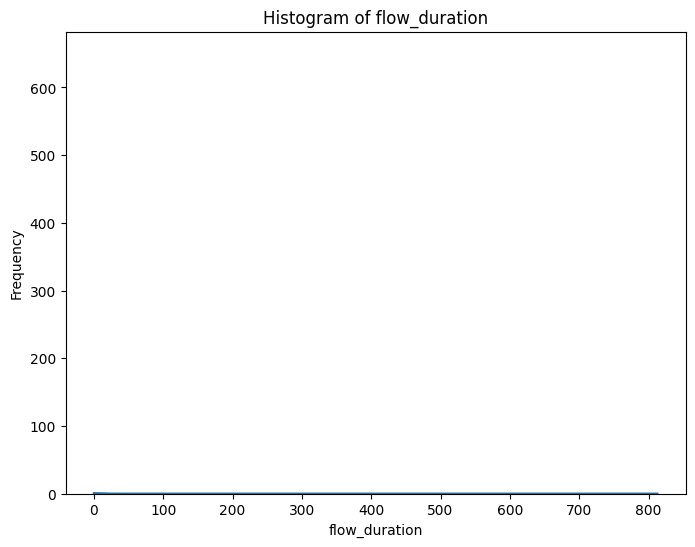

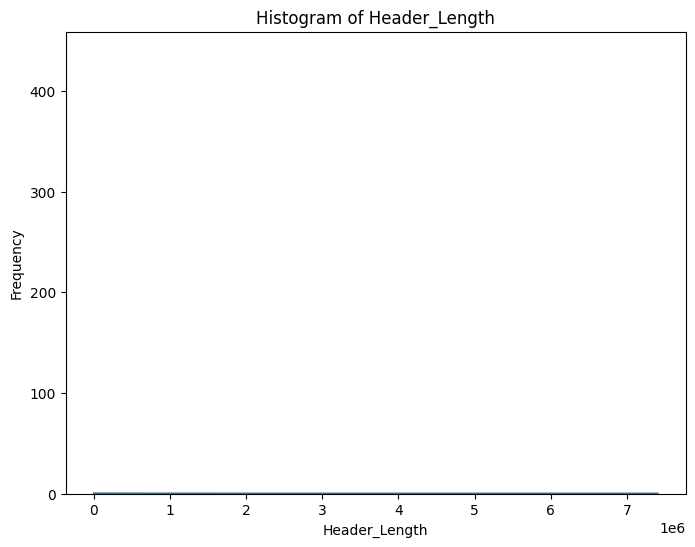

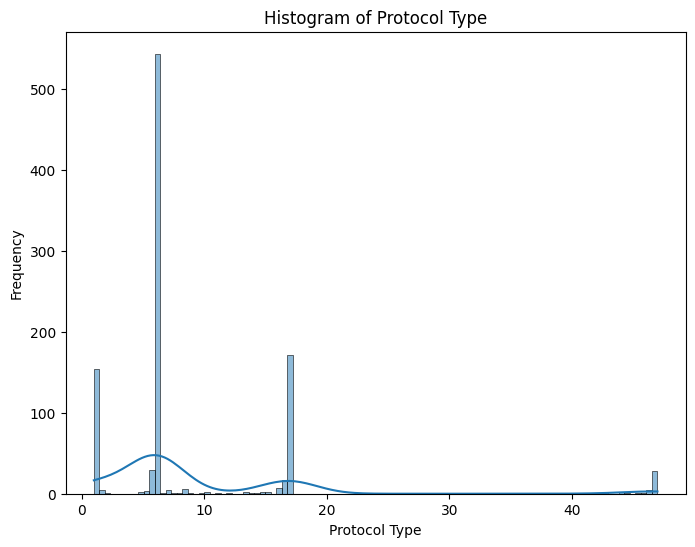

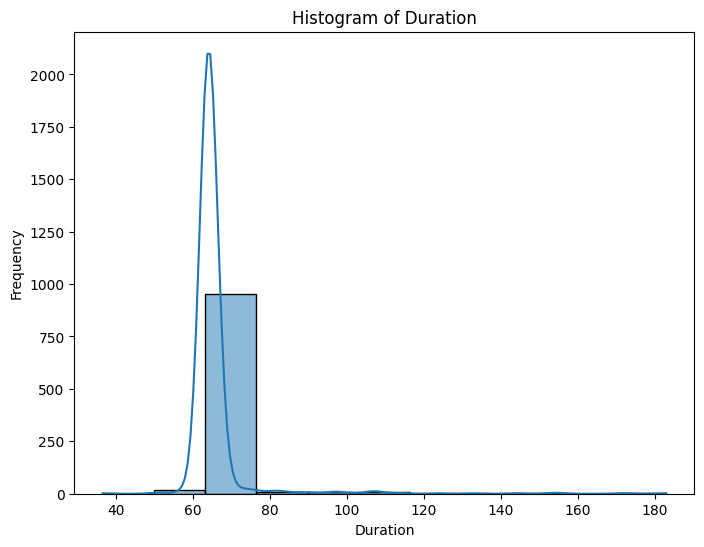

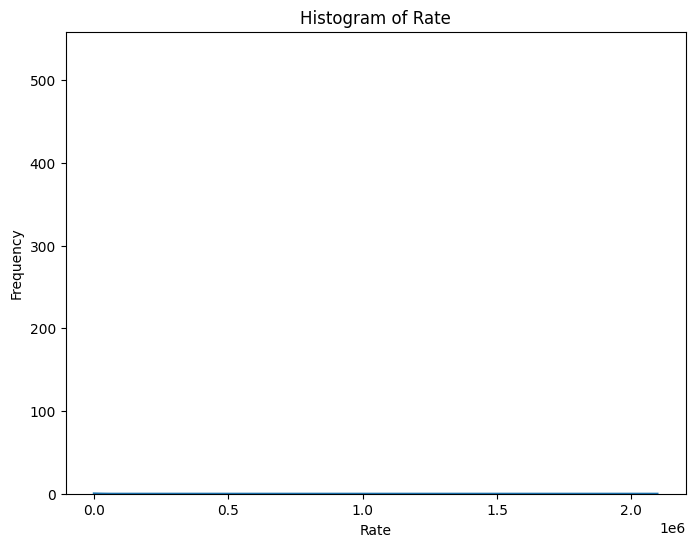

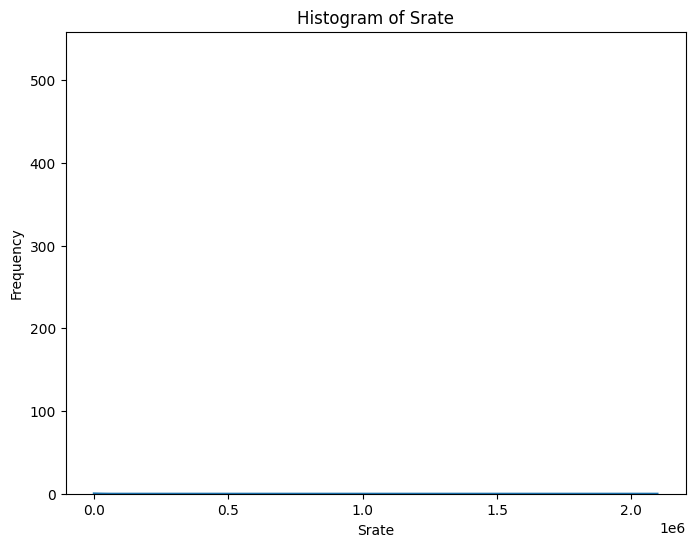

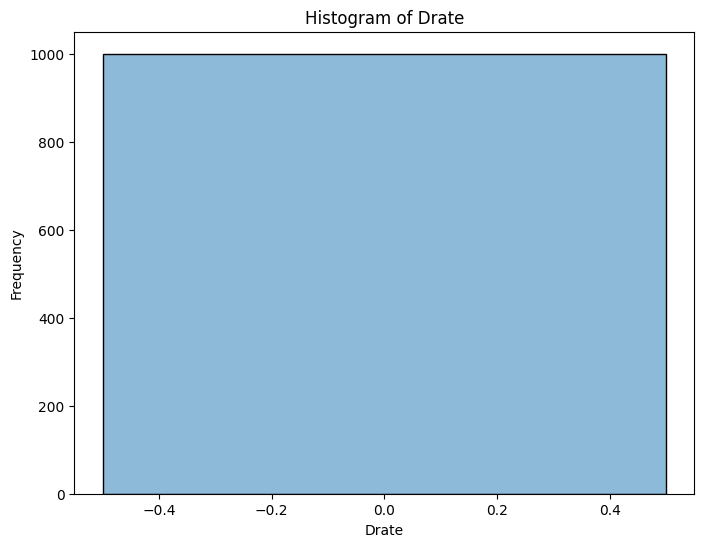

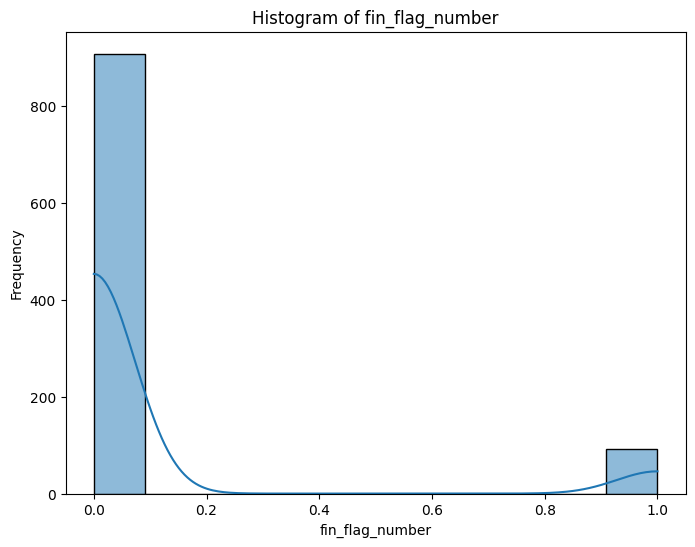

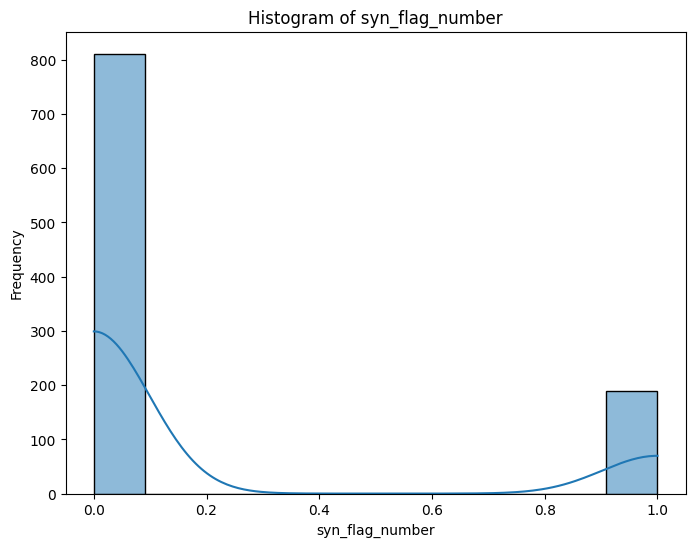

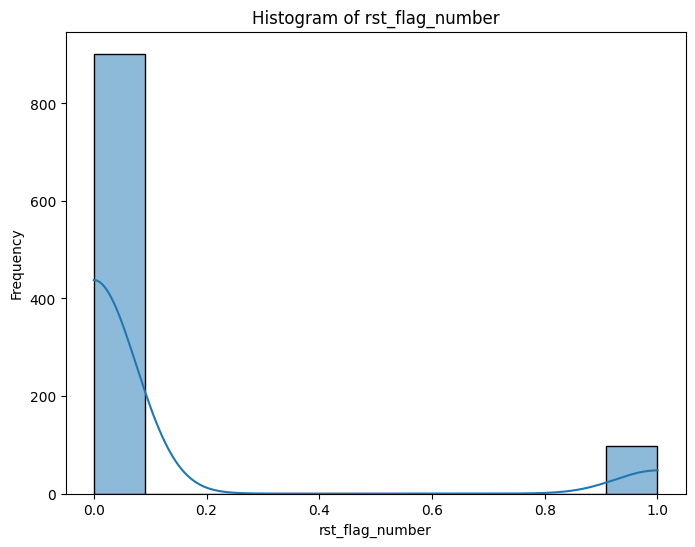

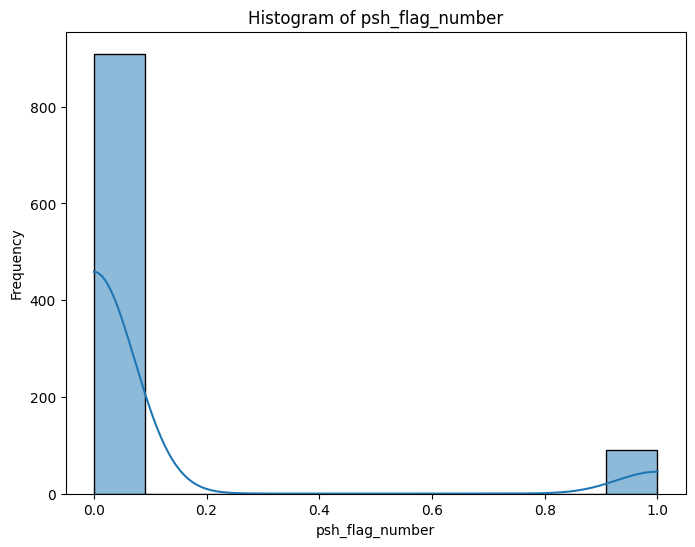

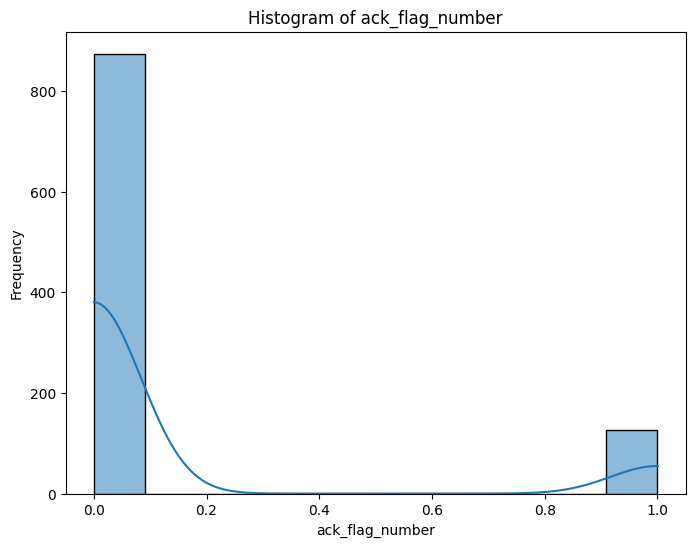

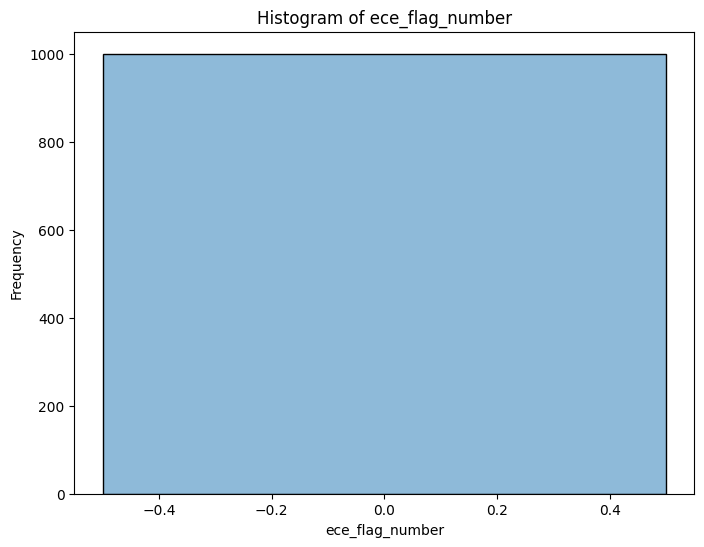

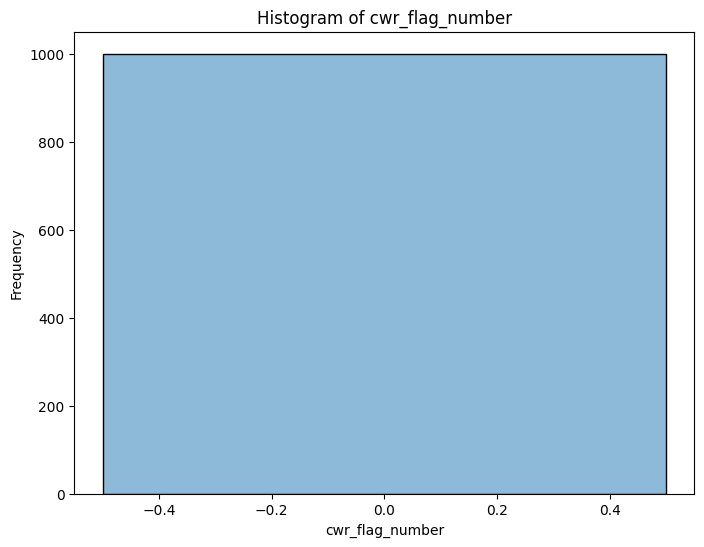

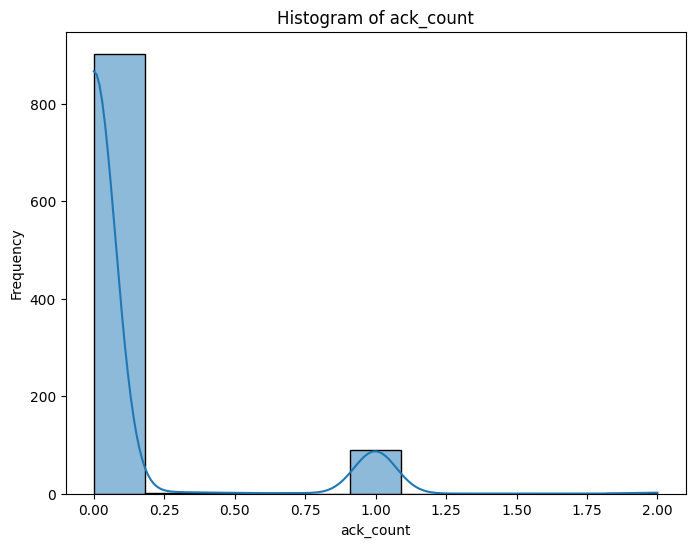

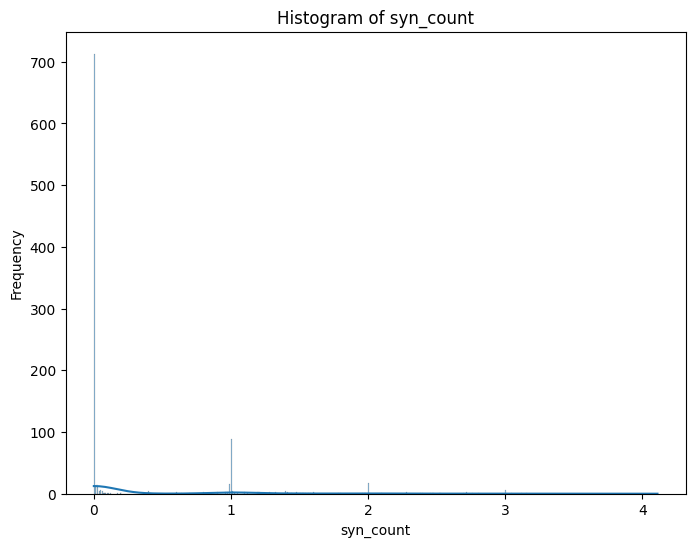

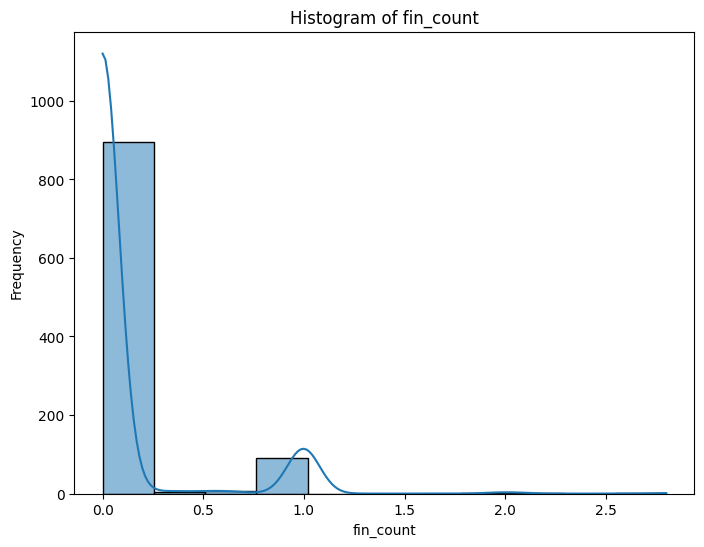

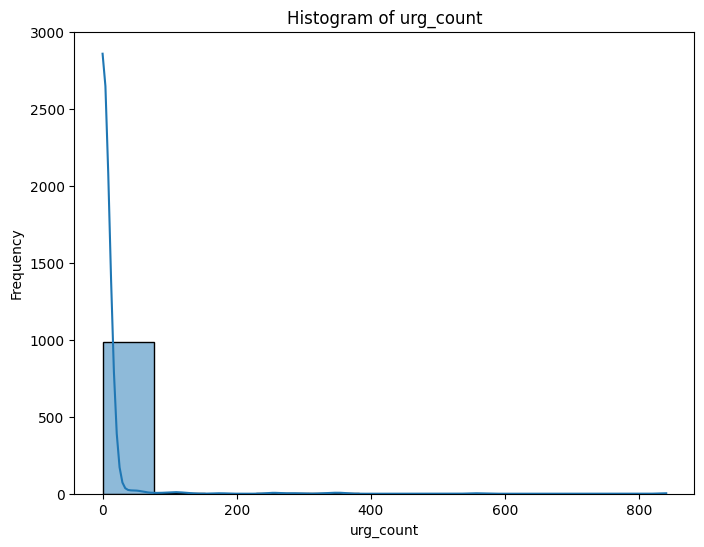

In [ ]:
visualize_dataset(train_data,sample_size=1000)

# 2. Task: Feature Extraction
   - Identify relevant features from the network traffic data
   - Extract features such as IP addresses, port numbers, packet size, and protocols


 Extracting features from packets flowing in and out of an IoT gateway depends on the specific analysis or use case you want to achieve. Important features to consider can vary depending on the network traffic and the insights you seek. However, here are some common features that might be relevant for analyzing packets in an IoT gateway scenario:

1. **Source and Destination IP Addresses**: To identify the devices communicating with the gateway and the destination servers they are accessing.

2. **Source and Destination Port Numbers**: To determine the application or service associated with each packet.

3. **Protocol Type**: To distinguish between TCP, UDP, ICMP, etc., which can help identify the nature of the traffic.

4. **Packet Size**: To analyze the size of packets being transmitted and received.

5. **Packet Timestamps**: To understand the timing and frequency of communication between devices and servers.

6. **Number of Packets**: To count the total number of packets exchanged during a communication session.

7. **Rate of Packets**: To calculate the rate at which packets are being transmitted.

8. **Packet Flags**: For TCP packets, flags like SYN, ACK, FIN, etc., can provide insights into connection establishment and termination.

9. **Packet Payload**: For some applications, the payload data may contain valuable information.

10. **Packet Direction**: To distinguish between inbound and outbound traffic.

11. **Packet TTL (Time To Live)**: To analyze the number of hops the packet can take before being discarded.

12. **Packet Source MAC Address**: For wired networks, the MAC address can be useful for device identification.

13. **Packet Encryption or Security**: For encrypted traffic, knowing the encryption protocols can be vital.

14. **Packet Type**: For protocols like DNS, DHCP, etc., understanding the specific type of packet can provide insights.

15. **Packet Sequence Numbers**: For protocols with sequence numbers, analyzing the order of packets can be useful.

16. **Packet Payload Size**: If the packet contains payload data, analyzing its size might be important.

17. **Packet Fragmentation**: For fragmented packets, understanding the reassembly process can be necessary.

18. **Packet Inter-Arrival Time (IAT)**: To determine the time between successive packets.

19. **Packet Header Length**: To analyze the size of packet headers.

20. **Packet TTL**: Time To Live value indicating the number of hops the packet can traverse.

Keep in mind that these are general features, and the relevance of each feature can vary depending on your specific use case and objectives. Additionally, you may need to preprocess and transform the data before extracting these features. Consider consulting with network experts or data scientists to tailor the feature extraction process to your specific IoT gateway environment.

In [15]:
import pandas as pd
import numpy as np

In [16]:
#loading the data set that has been extracted from the CICIOT2023 168 csv files
input_file_path = "E:/NITW/Project/Datasets/CICIOT2023_EXTRACTED/train_data.csv"
total_data = pd.read_csv(input_file_path)